In [8]:
import os
import cv2
from imutils.perspective import four_point_transform
import math
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [9]:
def disp_img(img):
    cv2.imshow("Image", img)
    cv2.waitKey(0)

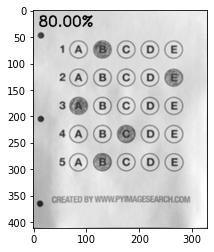

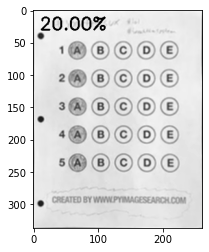

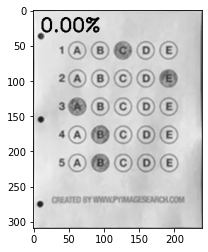

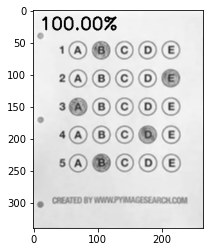

In [10]:
for name in os.listdir("./"):
    ANSWER_KEY = {0: 1, 1: 4, 2: 0, 3: 3, 4: 1}
    if not ".jpg" in name:
        continue
    img = cv2.imread(name)
    grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #disp_img(grey)
    t_lower = 50  # Lower Threshold
    t_upper = 150  # Upper threshold

    gaussian = cv2.GaussianBlur(grey,(3,3),cv2.BORDER_DEFAULT)
    edges = cv2.Canny(gaussian,100,200)
    
    contours, hierarchy = cv2.findContours(edges,cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    cnt = max(contours, key = cv2.contourArea)

    arclen = cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, 0.02* arclen, True)
    
    #contourImg = cv2.drawContours(img, approx, -1, (0,255,0), 3)
    #cv2.imshow("Contours123", contourImg)
    warped = four_point_transform(gaussian, approx.reshape(4, 2))
    ret, thresh1 = cv2.threshold(warped, 180, 255, cv2.THRESH_BINARY)
    thresh1 = cv2.bitwise_not(thresh1)
    #disp_img(thresh1)
    contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
    answer = []
    score = 0
    boundary = []
    for cnt in contours:
        (x, y, w, h) = cv2.boundingRect(cnt)
        ar = w / float(h)
        
        if w >= 20 and h >= 20 and ar >= 0.9 and ar <= 1.1:
            boundary.append([x,y])
            answer.append(cnt)
        
    q_num = 4
    
    for i in range(5, len(answer)+1, 5):
        ans = answer[i-5:i]
        bnd = boundary[i-5:i]
        ans = [x for _, x in sorted(zip(bnd, ans), key=lambda pair: pair[0][0])]
        selected = -1
        maxi  = 0
        for j in range(len(ans)):
            cimg = np.zeros_like(thresh1)
            cv2.drawContours(cimg, ans, j, color=255, thickness=-1)
            pts = np.where(cimg == 255)
            pimg = np.zeros_like(thresh1)
            pimg[pts[0], pts[1]] = 255
            
            #disp_img(pimg)
            count = cv2.countNonZero(thresh1[pts[0], pts[1]])
            if count > maxi:
                maxi = count
                selected = j
        if selected == ANSWER_KEY[q_num]:
            score += 1
        q_num -= 1
        #print("---", selected, "----")
    score = (score / 5.0) * 100
    cv2.putText(warped, "{:.2f}%".format(score), (10, 30),
        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)
    #cv2.imshow("Exam", warped)
    #cv2.waitKey(0)
    plt.figure()
    plt.imshow(warped, cmap='gray')
    plt.show()
    